<a href="https://colab.research.google.com/github/innovativenexusbd/AgroAI/blob/main/marketdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

**Load the Data and Calculate top demanded crops**

In [16]:
df = pd.read_csv('crop_data.csv')
total_consumption = df.groupby('Crop')['Consumed'].sum().reset_index()
top_10_crops = total_consumption.nlargest(10, 'Consumed')['Crop']
print("Top 10 crops with the most demand based on historical data:")
print(top_10_crops)

Top 10 crops with the most demand based on historical data:
6        Rice
3      Onions
5    Potatoes
0      Barley
2        Corn
8    Tomatoes
4        Peas
7    Soybeans
9       Wheat
1     Carrots
Name: Crop, dtype: object


**Training the Linear Regression Model and Predicting the Future of Top 10 Crops with Most Consumptions**

In [17]:
future_predictions = []
for crop in top_10_crops:
    crop_data = df[df['Crop'] == crop]
    X = np.array(range(1, 11)).reshape(-1, 1)  # Years 1 to 10
    y_produced = crop_data['Produced'].values
    y_consumed = crop_data['Consumed'].values
    model_produced = LinearRegression().fit(X, y_produced)
    pred_produced = model_produced.predict(np.array([[11]]))[0]
    model_consumed = LinearRegression().fit(X, y_consumed)
    pred_consumed = model_consumed.predict(np.array([[11]]))[0]
    future_predictions.append((crop, pred_produced, pred_consumed))

**Visualizing the Trends**

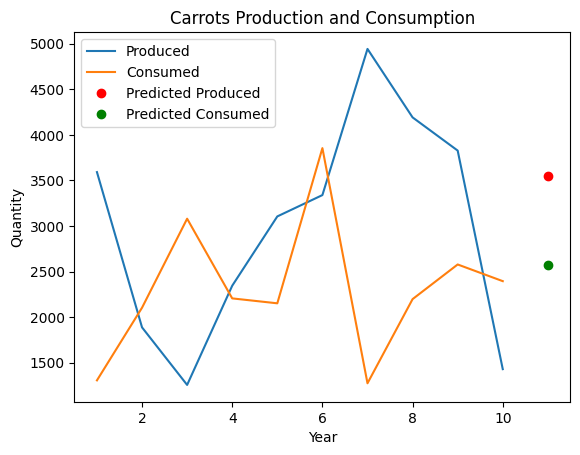

In [18]:

    # Plot production and consumption
    plt.figure()
    plt.plot(range(1, 11), y_produced, label='Produced')
    plt.plot(range(1, 11), y_consumed, label='Consumed')
    plt.plot(11, pred_produced, 'ro', label='Predicted Produced')
    plt.plot(11, pred_consumed, 'go', label='Predicted Consumed')
    plt.title(f'{crop} Production and Consumption')
    plt.xlabel('Year')
    plt.ylabel('Quantity')
    plt.legend()
    plt.savefig(f'{crop}_trend.png')
    plt.show()


**Ranking the Crops Based on High Consumption and Low Production**

In [19]:
# Rank crops based on high consumption and low production
future_predictions_df = pd.DataFrame(future_predictions, columns=['Crop', 'Pred_Produced', 'Pred_Consumed'])
future_predictions_df['Demand_Supply_Gap'] = future_predictions_df['Pred_Consumed'] - future_predictions_df['Pred_Produced']
top_10_future_crops = future_predictions_df.nlargest(10, 'Demand_Supply_Gap')

print("Top 10 crops with high consumption and low production based on future prediction:")
print(top_10_future_crops)


Top 10 crops with high consumption and low production based on future prediction:
       Crop  Pred_Produced  Pred_Consumed  Demand_Supply_Gap
4      Corn    2726.333333    4535.466667        1809.133333
5  Tomatoes    1975.333333    3367.066667        1391.733333
3    Barley    3660.800000    4114.066667         453.266667
1    Onions    2370.266667    2645.466667         275.200000
7  Soybeans    2575.333333    2808.866667         233.533333
2  Potatoes    2985.066667    3088.000000         102.933333
8     Wheat    3276.666667    2889.066667        -387.600000
6      Peas    2852.733333    2152.533333        -700.200000
0      Rice    3791.400000    3055.733333        -735.666667
9   Carrots    3552.133333    2568.533333        -983.600000


**Saving the Ranking**

In [20]:
top_10_future_crops.to_csv('top_10_future_crops.csv', index=False)